In [37]:
import openml
import numpy as np
import seaborn as sns

In [38]:
ds_id = '1458'
dataset = openml.datasets.get_dataset(ds_id)

In [39]:
X, y, categorical_indicator, attribute_names = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

In [40]:
print (X.shape)
print (y.shape)

(200, 10000)
(200,)


In [41]:
zero_std_idx = np.where(X.std()==0)[0]
print (len(zero_std_idx))

39


In [42]:
corr_df = X.corr()

<AxesSubplot:>

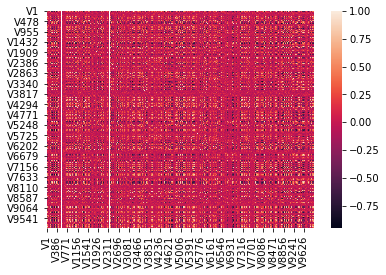

In [43]:
sns.heatmap(corr_df)

In [44]:
corr_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
V1,1.000000,-0.097271,0.671410,0.325847,-0.182733,-0.723390,-0.130164,-0.083586,-0.342748,-0.257570,...,0.815750,-0.861995,0.016273,-0.215105,-0.384169,0.270542,0.683995,-0.036608,0.039600,-0.230098
V2,-0.097271,1.000000,0.055190,-0.038123,0.003501,-0.006269,0.098734,0.002217,0.013487,-0.015781,...,-0.058276,0.048844,0.113939,-0.032012,0.010913,-0.073855,-0.050938,-0.023612,0.039335,0.000029
V3,0.671410,0.055190,1.000000,0.052600,-0.282543,-0.641614,0.252607,-0.044879,-0.487694,-0.503276,...,0.736457,-0.717362,0.063251,-0.364913,-0.246490,-0.024634,0.596006,-0.144969,-0.010927,0.028920
V4,0.325847,-0.038123,0.052600,1.000000,0.186500,-0.214663,-0.349371,0.070831,0.429222,0.112466,...,0.101930,-0.301408,-0.040473,0.296352,0.032366,0.329240,0.233198,0.064742,0.027898,-0.357416
V5,-0.182733,0.003501,-0.282543,0.186500,1.000000,0.149299,-0.441311,0.143544,0.534373,0.478025,...,-0.318662,0.151472,0.024709,0.826716,0.011846,0.243504,-0.185303,0.175760,0.034022,-0.515231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V9996,0.270542,-0.073855,-0.024634,0.329240,0.243504,-0.040952,-0.841356,0.109544,0.409327,0.583698,...,0.278600,-0.419512,-0.097552,0.319184,-0.517363,1.000000,0.508078,0.105642,-0.056022,-0.678710
V9997,0.683995,-0.050938,0.596006,0.233198,-0.185303,-0.604626,-0.255954,-0.001152,-0.203907,-0.104560,...,0.694117,-0.849996,0.022730,-0.151004,-0.532023,0.508078,1.000000,-0.108973,-0.009769,-0.207422
V9998,-0.036608,-0.023612,-0.144969,0.064742,0.175760,0.088211,-0.160395,0.155505,0.116300,0.280914,...,-0.099566,0.106131,-0.067455,0.131141,-0.023002,0.105642,-0.108973,1.000000,-0.019947,-0.201657
V9999,0.039600,0.039335,-0.010927,0.027898,0.034022,-0.028230,0.001855,0.011574,-0.094104,-0.007911,...,-0.039203,0.009682,0.093385,0.041821,0.033203,-0.056022,-0.009769,-0.019947,1.000000,-0.002820


In [49]:
pair = np.where(corr_df > 0.8)

In [57]:
pair

(array([   0,    0,    0, ..., 9999, 9999, 9999]),
 array([   0,  107,  192, ..., 9725, 9734, 9999]))

In [58]:
pair[0]

0

In [75]:
feats = list(range(X.shape[1]))
print (len(feats))
for i in range(len(pair)):
    big = max(pair[0][i], pair[1][i])
    small = min(pair[0][i], pair[1][i])
    if big == small:
        continue
    else:
        print (big)
        feats.pop(big)

10000
107


In [76]:
small

0

In [77]:
big

107